# An automatically-labeled scatter plot with linear fit


In [35]:
#! /home/krueger/python/bin/python3
%matplotlib inline
import matplotlib.pyplot as plt
import rplot as rp
import pandas as pd
import numpy as np
from scipy import stats
from adjustText import adjust_text

For each piece of data, add labels using adjust_text package 

In [36]:
def addLabels(labels, allX, allY):
    notIsnan = np.argwhere(np.isfinite(allY))
    notIsnan = notIsnan.tolist()
    indices = list()
    for row in notIsnan:
        indices.append(row[0])
    texts = [(plt.text(allX[i], allY[i], labels[i], ha='center', va='center', fontsize=8.5)) for i in indices]
    adjust_text(texts, arrowprops = dict(arrowstyle='->', color='gray'))

Calculate parameters for a linear best-fit curve and plot it

In [37]:
def addLine(allX, allY):
    allX, allY = zip(*sorted(zip(allX, allY)))
    coeffs = np.polyfit(allX, allY, 1)
    xRange = np.amax(allX) - np.amin(allX)
    xVals = np.linspace(np.amin(allX)-0.08*xRange, np.amax(allX)+0.08*xRange, 200)
    plt.plot(xVals, xVals*coeffs[0]+coeffs[1], 'k:')

Using this general function, we plot a selected x and y series. We need the whole data array because
the data in other columns tells us which category each point belongs to (homodimer or heterodimer, etc.) 

In [38]:
def makePlot(datArray, xSeries, ySeries, xname, yname, fname, addLabel = True):
    print('making plot')
    #plot settings
    plt.figure(figsize=(6,6))
    plt.ylim(0.7,3.4)
    fontSize = 12
    plt.rcParams.update({'font.size': fontSize})
    fo = rp.formatObj()
    plt.xlabel(xname)
    plt.ylabel(yname)
    # best fit line 
    fitX, fitY = zip(*sorted(zip(xSeries, (np.power(ySeries.values, -1)*1000))))
    coeffs = np.polyfit(fitX, fitY, 1)
    slope, intercept, r_val, p_val, std_err = stats.linregress(fitX, fitY)
    print(fname+' '+str(r_val**2))
    xRange = np.amax(fitX) - np.amin(fitX)
    xVals = np.linspace(np.amin(fitX)-0.08*xRange, np.amax(fitX)+0.08*xRange, 200)
    plt.plot(xVals, xVals*coeffs[0]+coeffs[1], ':', color='gray')
    #pick out homodimers, heterodimers, etc. 
    yValsHeteroLa = ySeries.where((datArray[1] == 0) & (datArray[2] == 0) & (datArray[25] == 1))
    yValsHomoLa = ySeries.where((datArray[1] == 1) & (datArray[2] == 0)& (datArray[25] == 1))
    yValsHeteroLb = ySeries.where((datArray[1] == 0) & (datArray[2] == 0) & (datArray[25] == 0))
    yValsHomoLb = ySeries.where((datArray[1] == 1) & (datArray[2] == 0)& (datArray[25] == 0))
    # convert from nm to wavenumber 
    yValsHeteroLa = (np.power(yValsHeteroLa.values, -1)*1000)
    yValsHeteroLb = (np.power(yValsHeteroLb.values, -1)*1000)
    yValsHomoLb = (np.power(yValsHomoLb.values, -1)*1000)
    yValsHomoLa = (np.power(yValsHomoLa.values, -1)*1000)
    #plot each category 
    plt.scatter(xSeries, yValsHomoLa, c = fo.getColor(1), marker = fo.getMarker(2), label = '$L_a$ homodimer')
    plt.scatter(xSeries, yValsHomoLb, c = fo.getColor(0), marker = fo.getMarker(2), label = '$L_b$ homodimer' )
    plt.scatter(xSeries, yValsHeteroLa, c = fo.getColor(1), marker = fo.getMarker(0), label = '$L_a$ heterodimer' )
    plt.scatter(xSeries, yValsHeteroLb, c = fo.getColor(0), marker = fo.getMarker(0), label = '$L_b$ heterodimer' )
    # add annotations. string together all arrays used 
    allX = np.concatenate((xSeries, xSeries, xSeries, xSeries))
    allY = np.concatenate((yValsHeteroLa,yValsHomoLa,yValsHeteroLb,yValsHomoLb))
    labels = np.concatenate((datArray[0], datArray[0], datArray[0], datArray[0]))
    nLabels = labels.shape[0]
    for i in range(0, nLabels):
        if (labels[i].split('_')[0] == labels[i].split('_')[1]):
            labels[i] = labels[i].split('_')[0]+'_dim'
    if addLabel:
        addLabels(labels, allX, allY)
    # legend
    if 'Band' in fname:
        plt.legend(loc='lower right', fontsize=10)
    plt.savefig(fname+'.pdf', format='pdf', bbox_inches='tight')

Load our data file and exclude structures we don't want. 

In [40]:
datArray = rp.loadFile('dimers.dat')
# exclude some structures 
namelist = ['furan', 'ether', 'acenaph']
datArray = datArray[~datArray[0].str.contains('|'.join(namelist))]

Make the plot. Here's one I can show you because it didn't make it into the article about this stuff. 

making plot
nOverlap 0.327906541891


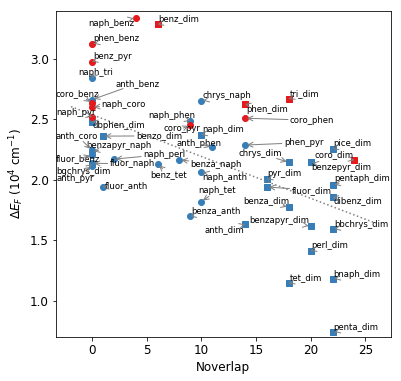

In [42]:
xSeries = datArray[4]
ySeries = datArray[13]
makePlot(datArray, xSeries, ySeries, 'Noverlap', '$\Delta E_F$ (10$^4$ cm$^{-1}$)', 'nOverlap', True)